In [2]:
import pandas as pd
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#транзакции
trans = pd.read_csv(r'C:\dz\csv\trans.csv') 

In [328]:
 #траффик
traff = pd.read_csv(r'C:\dz\csv\ludi.csv')

In [329]:
#клики
click = pd.read_csv(r'C:\dz\csv\cliks.csv') 

In [330]:

trans.rename(columns={'Unnamed: 0': 'store_id', 'Unnamed: 1': 'store_name'}, inplace=True)
traff.rename(columns={'Unnamed: 0': 'store_id', 'Unnamed: 1': 'store_name'}, inplace=True)

In [331]:
trans = trans.T
traff = traff.T

In [332]:
trans.drop(trans.tail(1).index,inplace=True)
traff.drop(traff.tail(1).index,inplace = True)

In [333]:
trans.tail()

,0,1,2,3,4,5,6,7,8,9
9/16/2020,235,327,198,313,130,295,242,170,386,266
9/17/2020,241,298,202,312,127,286,278,151,376,288
9/18/2020,249,306,223,292,128,262,261,172,425,282
9/19/2020,268,196,300,393,97,186,375,248,480,389
9/20/2020,199,166,167,189,85,160,227,141,367,206


In [334]:
traff.tail()

,0,1,2,3,4,5,6,7,8,9
9/16/2020,337,494,247,498,205,398,399,260,549,431
9/17/2020,374,403,253,492,206,393,435,220,531,361
9/18/2020,370,386,256,465,25,381,408,247,558,499
9/19/2020,412,256,525,661,197,264,587,459,634,664
9/20/2020,320,259,285,300,185,254,353,244,510,408


In [404]:
#массив транзакций по магазам
a = []
for i in range(10):
    a.append(trans[i][2:])


In [405]:
#массив траффика по магазам
b = []
for j in range(10):
    b.append(traff[j][2:])

In [627]:
#клики в сгруппированные по магазинам
E0 = [57,71,207,91,130,116,142,121,38,72,118,15,202,40,151,55,73,40,168,15,55,50,56,69,32,33,87,25,58]
E1 = [0,0,74,81,40,119,50,15,25,19,15,37,5,17,33,90,66,8,6,12,22,0,2,3,21,0,81,97,0]
E2 = [39,40,67,85,33,7,38,31,22,38,25,59,8,10,16,47,47,45,20,18,19,23,90,17,24,22,26,43,9]
E3 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,263,306,94]
E4 = [4,11,15,26,47,52,24,0,29,22,11,12,1,0,29,70,121,128,100,118,5,0,92,91,103,31,148,143,22]
E5 = [52,8,86,113,109,120,73,45,120,113,120,117,242,367,81,223,116,204,102,97,27,33,106,96,195,54,120,38,30]
E6 = [16,73,60,45,46,101,63,0,0,74,39,17,93,77,11,106,94,164,74,124,97,19,62,109,112,48,61,56,3]
E7 = [16,114,87,30,76,30,119,167,45,26,73,13,12,85,110,21,27,10,8,3,15,39,10,17,23,15,32,5,13]
E8 = [80,95,60,215,348,294,176,53,95,161,91,144,101,88,55,86,142,2,171,99,211,87,331,82,43,306,190,179,106]
E9 = [4,27,18,45,16,35,45,17,13,25,38,19,51,68,17,39,16,47,56,20,112,40,60,33,143,76,154,83,103]
y = [0.552614379,0.596953578,0.604536759,0.601032621,0.645622896,0.629570747,0.582241346,0.571051086,0.662891757,0.71528679,0.736156352,0.664890783,0.641625933,0.617394855,0.601851852,0.664491844,0.651691195,0.679038718,0.679487179,0.676218532,0.637945853,0.60618756,0.659270998,0.741552511,0.671031954,0.697655398,0.723226704,0.657104437,0.650187521]
X = [0.087581699,0.106141199,0.184203334,0.171555973,0.237093154,0.198501022,0.142773323,0.131826189,0.10192257,0.142745912,0.156944033,0.115343633,0.183946488,0.153532054,0.150238949,0.184943538,0.181254841,0.173030708,0.184458399,0.135511516,0.120971208,0.093780213,0.213946117,0.15738204,0.182294395,0.159487459,0.323226704,0.218511878,0.149335152]
acti_0 = [0.1832797427652733,0.17359413202933985,0.20877476519636615,0.2388451443569554,0.37790697674418605,0.28292682926829266,0.32272727272727275,0.34277620396600567,0.084070796460177,0.1889763779527559, 0.3746031746031746, 0.046296296296296294, 0.5595567867036011, 0.09111617312072894, 0.412568306010929, 0.13613861386138615, 0.19010416666666666, 0.11267605633802817, 0.45776566757493187, 0.05102040816326531, 0.11224489795918367, 0.12886597938144329,0.14,0.17737789203084833,0.09495548961424333, 0.08823529411764706, 0.23513513513513515, 0.06067961165048544, 0.18125]
acti_1 = [0.0, 0.0, 0.20385674931129477, 0.18, 0.09732360097323602, 0.29310344827586204, 0.11904761904761904, 0.0528169014084507, 0.06887052341597796, 0.04318181818181818, 0.03740648379052369, 0.08726415094339622, 0.012285012285012284, 0.03811659192825112, 0.13580246913580246, 0.23136246786632392, 0.14254859611231102, 0.02077922077922078, 0.013793103448275862, 0.028503562945368172, 0.05759162303664921, 0.0, 0.004784688995215311, 0.007653061224489796, 0.04251012145748988, 0.0, 0.20984455958549222, 0.37890625,0.0]
acti_2 = [0.10955056179775281, 0.11661807580174927, 0.22483221476510068, 0.21628498727735368, 0.12890625, 0.015418502202643172, 0.06109324758842444, 0.08423913043478261, 0.06285714285714286, 0.1130952380952381, 0.05868544600938967, 0.2565217391304348, 0.024922118380062305, 0.018083182640144666, 0.045584045584045586, 0.13352272727272727, 0.22815533980582525,0.15358361774744028, 0.07874015748031496, 0.10843373493975904,0.04157549234135667,0.0732484076433121,0.2616279069767442,0.0752212389380531,0.09716599190283401,0.08695652173913043,0.1015625,0.08190476190476191,0.031578947368421054]
acti_3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002331002331002331, 0.0, 0.0, 0.0, 0.5655913978494623, 0.4629349470499244, 0.31333333333333335]
acti_4 = [0.02564102564102564, 0.057291666666666664, 0.07281553398058252, 0.11304347826086956, 0.24102564102564103, 0.27225130890052357, 0.14285714285714285, 0.0, 0.14795918367346939, 0.09691629955947137, 0.05314009661835749, 0.06349206349206349, 0.013157894736842105, 0.0, 0.1657142857142857, 0.2788844621513944, 0.5734597156398105, 0.6956521739130435, 0.4672897196261682, 0.5645933014354066, 0.02717391304347826, 0.0, 0.41818181818181815, 0.4117647058823529, 0.5024390243902439, 0.15048543689320387, 5.92, 0.7258883248730964, 0.11891891891891893]
acti_5 = [0.22413793103448276, 0.023809523809523808, 0.25443786982248523, 0.30294906166219837, 0.40370370370370373, 0.36923076923076925, 0.23778501628664495, 0.1956521739130435, 0.41379310344827586, 0.300531914893617, 0.3409090909090909, 0.32142857142857145, 0.6402116402116402, 1.287719298245614, 0.32270916334661354, 0.5603015075376885, 0.3028720626631854, 0.5271317829457365, 0.24401913875598086, 0.2664835164835165, 0.09608540925266904, 0.15714285714285714, 0.2663316582914573, 0.22641509433962265, 0.4899497487437186, 0.13740458015267176, 0.31496062992125984, 0.14393939393939395, 0.11811023622047244]
acti_6 = [0.0463768115942029, 0.13957934990439771, 0.12371134020618557, 0.09740259740259741, 0.11734693877551021, 0.20321931589537223, 0.09767441860465116, 0.0, 0.0, 0.1378026070763501, 0.07991803278688525, 0.03953488372093023, 0.21330275229357798, 0.13162393162393163, 0.03151862464183381, 0.21855670103092784, 0.19789473684210526, 0.3744292237442922, 0.18592964824120603, 0.27802690582959644, 0.18097014925373134, 0.05307262569832402, 0.1546134663341646, 0.8861788617886179, 0.2807017543859649, 0.1103448275862069, 0.14950980392156862, 0.09540034071550256, 0.0084985835694051]
acti_7 = [0.08, 0.35403726708074534, 0.29591836734693877, 0.09523809523809523, 0.26573426573426573, 0.08130081300813008, 0.27419354838709675, 0.6139705882352942, 0.12968299711815562, 0.07669616519174041, 0.2347266881028939, 0.042483660130718956, 0.03636363636363636, 0.18973214285714285, 0.41509433962264153, 0.07806691449814127, 0.10546875, 0.04065040650406504, 0.03278688524590164, 0.010238907849829351, 0.03571428571428571, 0.16049382716049382, 0.040160642570281124, 0.11805555555555555, 0.08846153846153847, 0.06818181818181818, 0.12955465587044535, 0.010893246187363835, 0.05327868852459016]
acti_8 = [0.18018018018018017, 0.2111111111111111, 0.14705882352941177, 0.38392857142857145, 0.8613861386138614, 0.5434380776340111, 0.298811544991511, 0.09981167608286252, 0.3584905660377358, 0.29219600725952816, 0.18055555555555555, 0.3025210084033613, 0.19423076923076923, 0.13858267716535433, 0.10204081632653061, 0.16862745098039217, 0.24108658743633277, 0.003976143141153081, 0.30700179533213645, 0.20245398773006135, 0.3528428093645485, 0.17159763313609466, 0.6606786427145709, 0.17672413793103448, 0.07832422586520947, 0.576271186440678, 0.34050179211469533, 0.2823343848580442, 0.20784313725490197]
acti_9 = [0.00980392156862745, 0.046153846153846156, 0.036, 0.08442776735459662, 0.029574861367837338, 0.059422750424448216, 0.056890012642225034, 0.035196687370600416, 0.027426160337552744, 0.05580357142857143, 0.1288135593220339, 0.04337899543378995, 0.10139165009940358, 0.09912536443148688, 0.04096385542168675, 0.09535452322738386, 0.0367816091954023, 0.10085836909871244, 0.12527964205816555, 0.0364963503649635, 0.16231884057971013, 0.11204481792717087, 0.14084507042253522, 0.0718954248366013, 0.33178654292343385, 0.21052631578947367, 0.30861723446893785, 0.125, 0.25245098039215685]
Usage = []
acti = []
Usage.append(E0)
Usage.append(E1)
Usage.append(E2)
Usage.append(E3)
Usage.append(E4)
Usage.append(E5)
Usage.append(E6)
Usage.append(E7)
Usage.append(E8)
Usage.append(E9)
acti.append(acti_0)
acti.append(acti_1)
acti.append(acti_2)
acti.append(acti_3)
acti.append(acti_4)
acti.append(acti_5)
acti.append(acti_6)
acti.append(acti_7)
acti.append(acti_8)
acti.append(acti_9)



In [605]:
#поэлементное деление транзакций на траффик (конверсия)
a1= []
for i in range(10):
    a1.append(np.divide(a[i],b[i]))


In [606]:
#поэлементное деление кликов на траффик
b1 = []
for i in range(10):
    b1.append(np.divide(Usage[i],b[i]))

In [607]:
def app(mass,k):
    a11 = []
    for i in range(len(a1[0])):
        a11.append(mass[k][i])
    return(a11)

def regr(arr1,arr2):
    arr11 = np.array(arr1).reshape(-1,1)
    slr = LinearRegression()
    slr.fit(arr11, arr2)
    plt.scatter(arr11, arr2)
    plt.plot(arr11, slr.predict(arr11), color='red', linewidth=2);

def change(arr):
    arr.index(max(arr))
    arr.remove(max(arr))
    arr.insert(arr.index(max(arr)),np.mean(arr))

    


In [608]:
#массив значений конверсии и активности
conv = [app(a1,i)for i in range(len(a1))] #конверсия
acti = [app(b1,i)for i in range(len(a1))] #активность

LinregressResult(slope=-0.06670619010058317, intercept=0.6538887863504904, rvalue=-0.24962239577049555, pvalue=0.19158144518435521, stderr=0.04980007989324382)

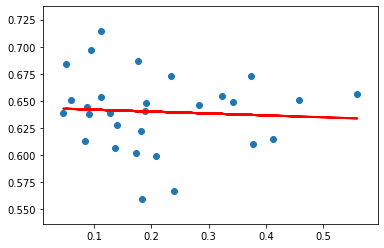

In [609]:
#1 магаз
#думаю стоит убрать выброс и заменить его на среднее по ряду
change(acti[0])
#теперь значение выброса стало равно среднему по выборке

regr(acti_0,conv[0])
linregress(acti[0],conv[0])

LinregressResult(slope=0.1798415056451069, intercept=0.6649713951157848, rvalue=0.296582442025087, pvalue=0.11822247585250119, stderr=0.11144723069276292)

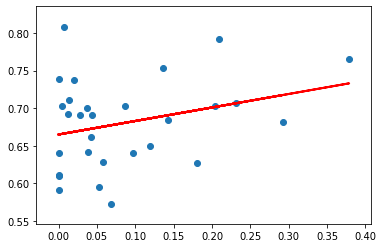

In [610]:
#2 магаз
regr(acti_1,conv[1])
linregress(acti[1],conv[1])


LinregressResult(slope=0.5846607576062205, intercept=0.628846107395234, rvalue=0.25359728264747816, pvalue=0.18437213698859797, stderr=0.4291835761665147)

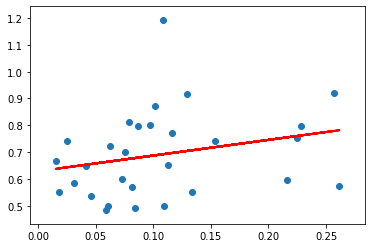

In [611]:
#3 магаз

regr(acti_2,conv[2])
linregress(acti[2],conv[2])

LinregressResult(slope=-0.2738227845260321, intercept=0.7457660040986253, rvalue=-0.06095811537130071, pvalue=0.7534283391251271, stderr=0.8628747694104694)

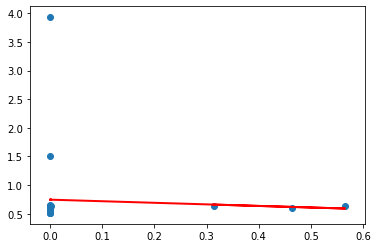

In [565]:
#4 магаз БЕССМЫСЛЕННО - БОЛЬШАЯ ЧАСТЬ ЗНАЧЕНИЙ НУЛИ
acti_3 = np.array(acti_3).reshape(-1,1)
regr(acti_3,conv[3])
linregress(acti[3],conv[3])

LinregressResult(slope=0.01655523608683505, intercept=0.5334845122001796, rvalue=0.3113586595031201, pvalue=0.10015059734349281, stderr=0.009724109420316741)

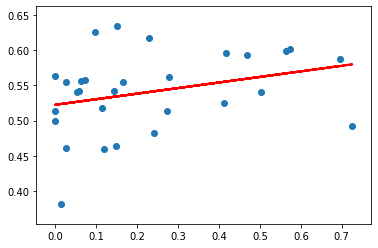

In [612]:
#5 магаз
#думаю стоит убрать выброс и заменить его на среднее по ряду

change(acti_4)
change(conv[4])
#plt.scatter(acti_4, conv[4])

regr(acti_4,conv[4])
linregress(acti[4],conv[4])


LinregressResult(slope=-0.007115018131850937, intercept=0.68321565188843, rvalue=-0.038106543863464626, pvalue=0.8444110629012828, stderr=0.035906991347047494)

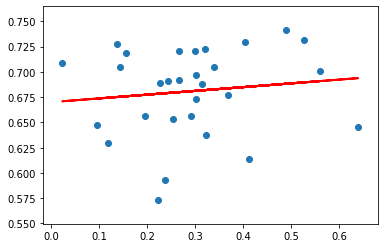

In [569]:
#6 магаз
change(acti_5)
nacti_5 = np.array(acti_5).reshape(-1,1)
regr(nacti_5,conv[5])
linregress(acti[5],conv[5])

LinregressResult(slope=-0.002831963301381128, intercept=0.6083954248278874, rvalue=-0.010936741626235175, pvalue=0.9550972273919057, stderr=0.04983010608303368)

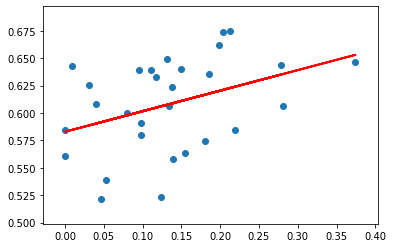

In [613]:
#7 магаз
change(acti_6)
change(conv[6])
regr(acti_6,conv[6])
linregress(acti[6],conv[6])

LinregressResult(slope=-0.06913928217072385, intercept=0.613712765138491, rvalue=-0.14752193741627764, pvalue=0.44505920052277914, stderr=0.08920896096326077)

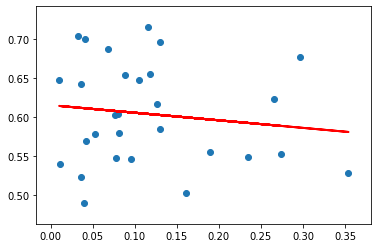

In [615]:
#8 магаз
change(acti_7)
change(conv[7])
regr(acti_7,conv[7])
linregress(acti[7],conv[7])

LinregressResult(slope=0.01297437780424154, intercept=0.7313651027648133, rvalue=0.045036575752426616, pvalue=0.8165545968958903, stderr=0.05538579704511721)

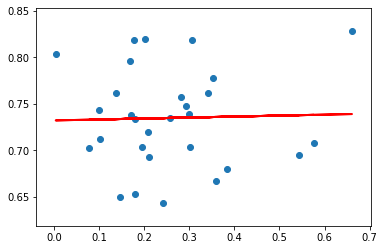

In [616]:
#9 магаз

change(conv[8])
change(acti_8)
#plt.scatter(acti_8, conv[8])
regr(acti_8,conv[8])
linregress(acti[8],conv[8])

LinregressResult(slope=0.14849812711777058, intercept=0.5533580907598395, rvalue=0.1984542513034389, pvalue=0.30206775485756604, stderr=0.14114112509329443)

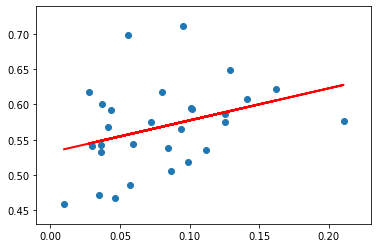

In [619]:
#10 магаз
#plt.scatter(acti_9, conv[9])
change(acti_9)
change(conv[9])
regr(acti_9,conv[9])
linregress(acti[9],conv[9])

LinregressResult(slope=0.39168493231801293, intercept=0.5848707838257318, rvalue=0.3933796410451989, pvalue=0.03475550510977767, stderr=0.17617177272865006)

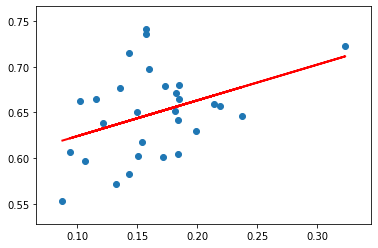

In [628]:
#все 10 магазов

regr(X,y)
linregress(X,y)

LinregressResult(slope=0.41191859510362305, intercept=0.5850772559045585, rvalue=0.2914295614076753, pvalue=0.12505975652582346, stderr=0.26020928501062673)

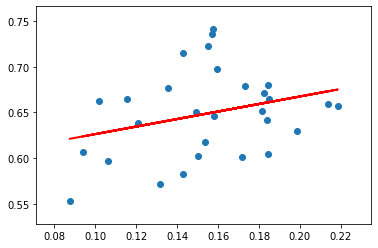

In [630]:
#попробуем без выброса
change(X)
regr(X,y)
linregress(X,y)